<a href="https://colab.research.google.com/github/guilleib227/Big-Data-Colab-UCN-/blob/main/k-means%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score


Madres con todos los parámetros alcohol incluido

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree,Age,target
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,319.925781,471.876302,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,78.841603,331.328595,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,273.000000,243.750000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,320.000000,372.500000,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,366.000000,626.250000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,671.000000,2420.000000,81.000000,1.000000


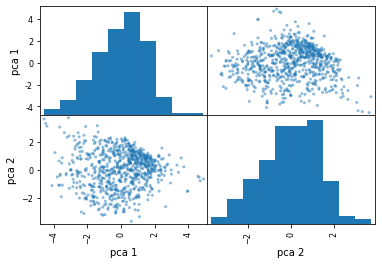

In [ ]:
data=pd.read_csv('Diabetes1.csv',sep=";")
display(data.describe())
data_scaled=StandardScaler().fit_transform(data)

#PCA reduction
pca=PCA(n_components=2,random_state=4).fit(data_scaled)
reduced_data = pca.transform(data_scaled) 
pca_samples = pd.DataFrame(data = reduced_data, columns = ['pca 1', 'pca 2'])
pd.plotting.scatter_matrix(pca_samples);


K-means score:  0.38023326463367163


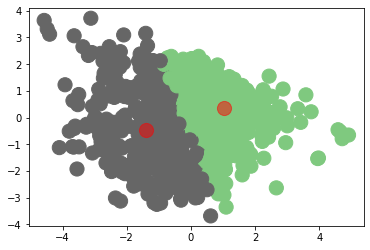

In [ ]:
#Kmeans 
n_clusters = 2
clusterer = KMeans(n_clusters = n_clusters, random_state=42).fit(pca_samples)
preds = clusterer.predict(pca_samples)
centers = clusterer.cluster_centers_
#Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(pca_samples, clusterer.labels_, metric='euclidean')
print ("K-means score: ", score)


plt.scatter(pca_samples['pca 1'], pca_samples['pca 2'], c = sample_preds, s = 200, cmap = 'Accent')


plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);